**Unveiling the Android App Market: Analyzing Google Play Store Data**

Description:

Clean, categorize, and visualize Google Play Store data to understand app market dynamics.

Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [55]:
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/googleplaystore.csv")

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [57]:
df.shape

(10841, 13)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [60]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [61]:
df.drop(df[df['Reviews']=='3.0M'].index,inplace=True)

In [62]:
df["Reviews"] = df["Reviews"].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [64]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [65]:
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)

In [66]:
pd.DataFrame(df['Size'])

,Size
0,19000
1,14000
2,8.7000
3,25000
4,2.8000
...,...
10836,53000
10837,3.6000
10838,9.5000
10839,NaN


In [67]:
df['Size']=df['Size'].astype(float)

In [68]:
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [70]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [71]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [72]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [73]:
df['Installs']=df['Installs'].str.replace("+",'')
df['Installs']=df['Installs'].str.replace(",",'')

df['Price']=df['Price'].str.replace("$",'')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [75]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [76]:
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [78]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [79]:
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [80]:
df.drop('Last Updated', axis=1, inplace=True)

In [81]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [82]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Month                0
Year                 0
dtype: int64

In [83]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [84]:
df['Size']=df['Size'].fillna(df['Size'].median())

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Month           10840 non-null  int32  
 13  Year            10840 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.4+ MB


In [86]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Month             0
Year              0
dtype: int64

In [87]:
df['Type']=df['Type'].fillna(df['Type'].mode().values[0])

In [88]:
df.duplicated().sum()

484

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.shape

(10356, 14)

In [91]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Month             0
Year              0
dtype: int64

In [92]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [93]:
df['Android Ver'] = df['Android Ver'].apply(lambda x: np.nan if x=='Varies with device' else x)

In [94]:
df['Android Ver'] = df['Android Ver'].str[:3]

In [95]:
df['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', nan, '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [96]:
df['Android Ver'].astype(float)

0        4.0
1        4.0
2        4.0
3        4.2
4        4.4
        ... 
10836    4.1
10837    4.1
10838    2.2
10839    NaN
10840    NaN
Name: Android Ver, Length: 10356, dtype: float64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  int64  
 4   Size            10356 non-null  float64
 5   Installs        10356 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  float64
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Current Ver     10348 non-null  object 
 11  Android Ver     9133 non-null   object 
 12  Month           10356 non-null  int32  
 13  Year            10356 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.1+ MB


In [98]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver       1223
Month                0
Year                 0
dtype: int64

In [99]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].median())

In [100]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       0
Month             0
Year              0
dtype: int64

In [101]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,6,2018


In [102]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Month,Year
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04,10356.000000,10356.000000,10356.000000
mean,4.203737,4.059308e+05,20.059381,1.415816e+07,1.030900,6.396871,2017.382870
std,0.485618,2.696907e+06,21.026420,8.024342e+07,16.279408,2.606437,1.112803
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,1.000000,2010.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000,5.000000,2017.000000
50%,4.300000,1.678500e+03,13.000000,1.000000e+05,0.000000,7.000000,2018.000000
75%,4.500000,4.638075e+04,26.000000,1.000000e+06,0.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,12.000000,2018.000000


In [103]:
# corr_data = df.corr()
# plt.figure(figsize=(10,10))
# sns.heatmap(corr_data,annot=True)
# plt.show()

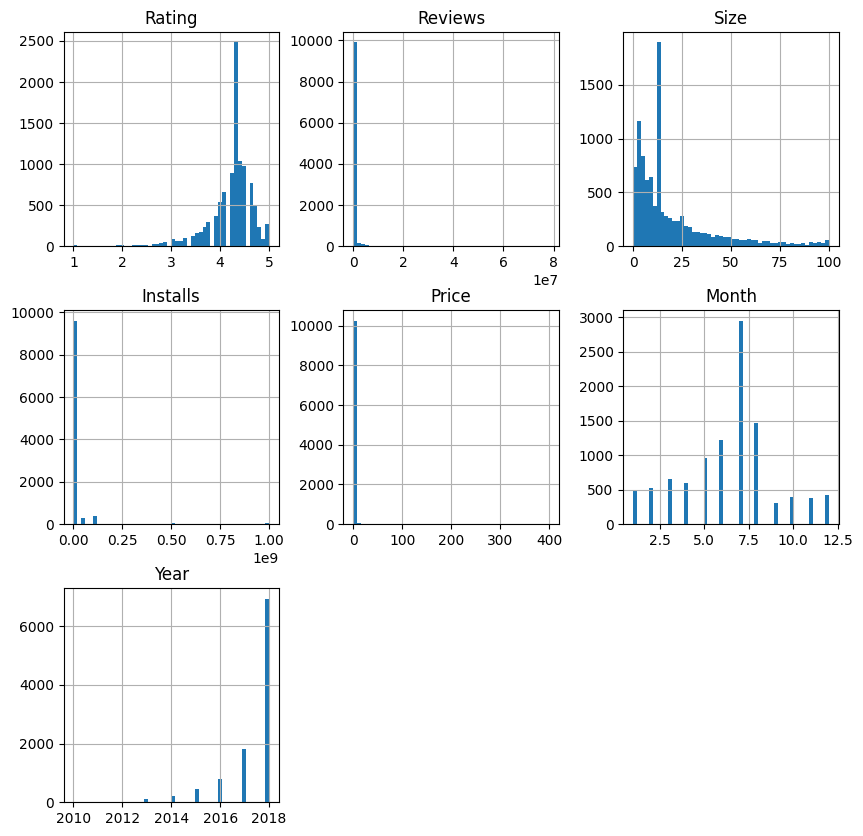

In [104]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(10,10))
plt.show()

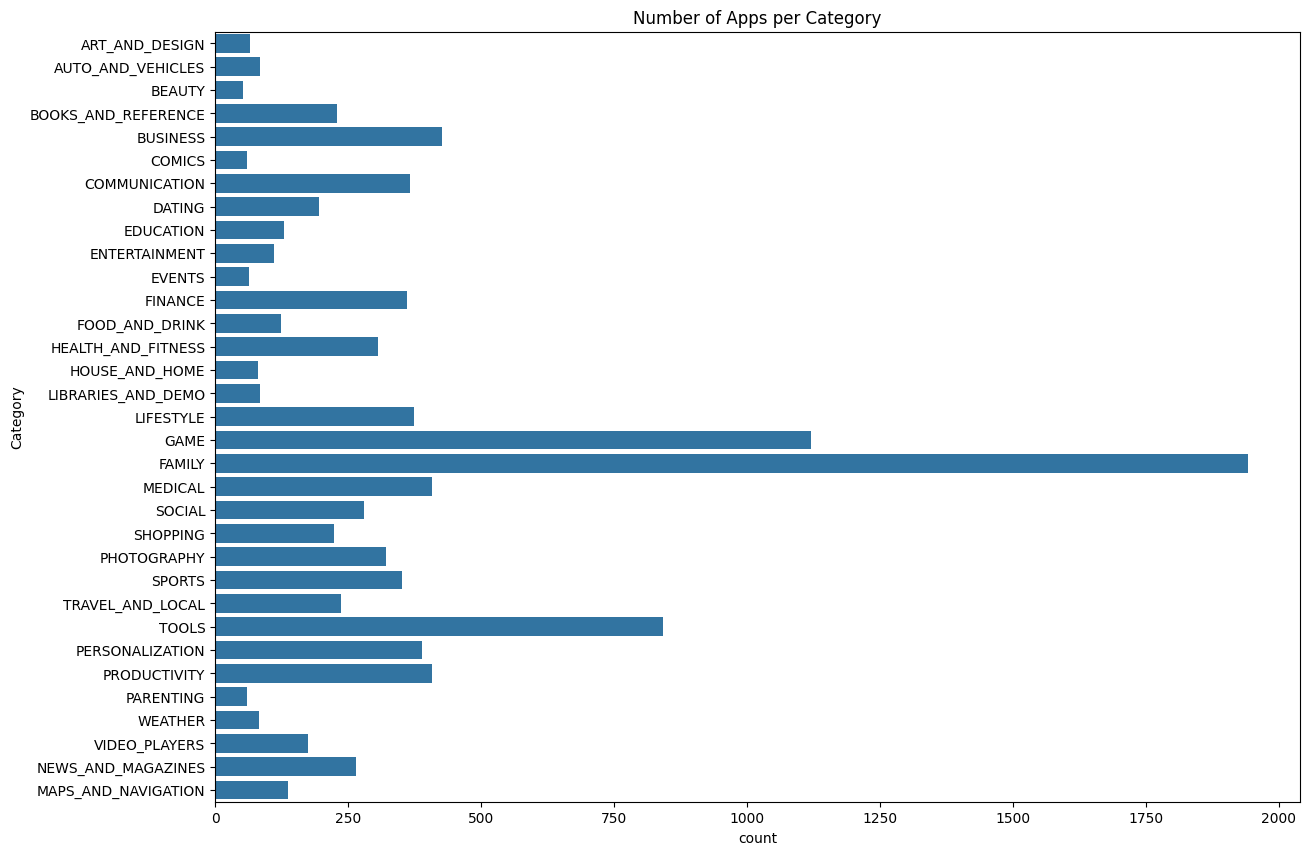

In [105]:
plt.figure(figsize=(14, 10))

sns.countplot(data=df, y='Category')

plt.title('Number of Apps per Category')
plt.show()

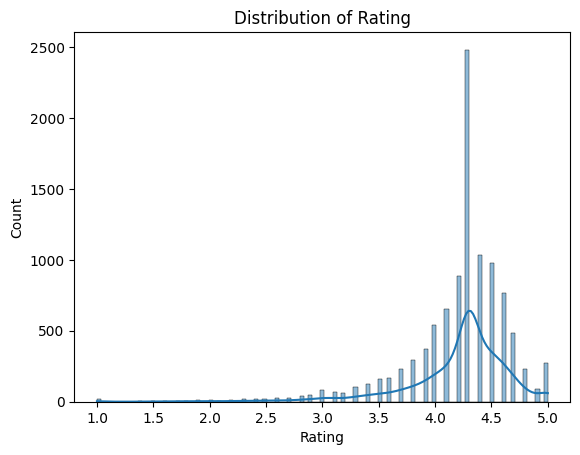

In [106]:
sns.histplot(data=df, x='Rating', kde=True)

plt.title('Distribution of Rating')
plt.show()

<Axes: xlabel='Rating', ylabel='Reviews'>

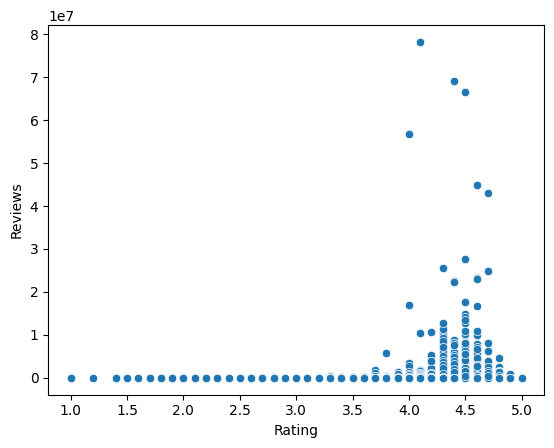

In [107]:
sns.scatterplot(x=df['Rating'], y=df['Reviews'] ,data=df)


<Axes: xlabel='Rating', ylabel='Reviews'>

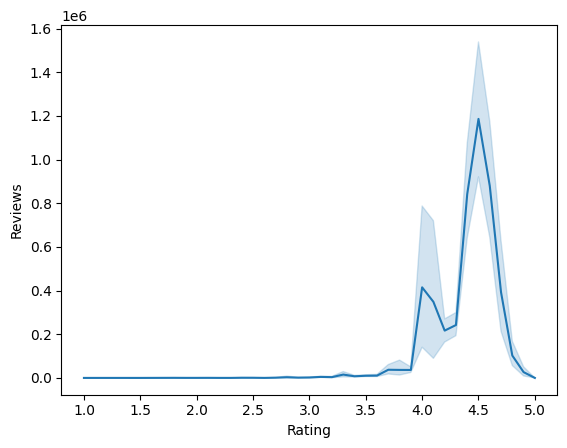

In [108]:
sns.lineplot(x=df['Rating'], y=df['Reviews'] ,data=df)

<Axes: xlabel='Rating', ylabel='Size'>

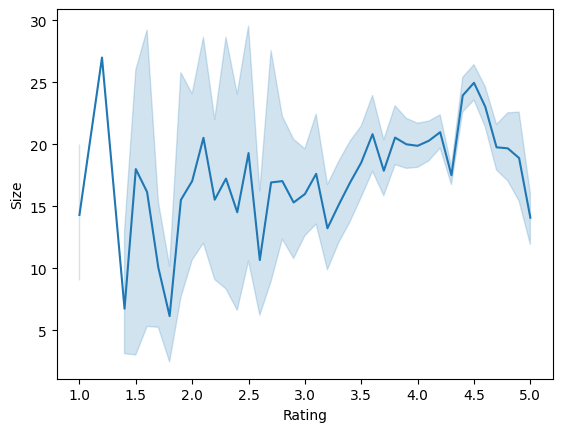

In [109]:
sns.lineplot(x=df['Rating'], y=df['Size'] ,data=df)

<Axes: xlabel='Rating', ylabel='Installs'>

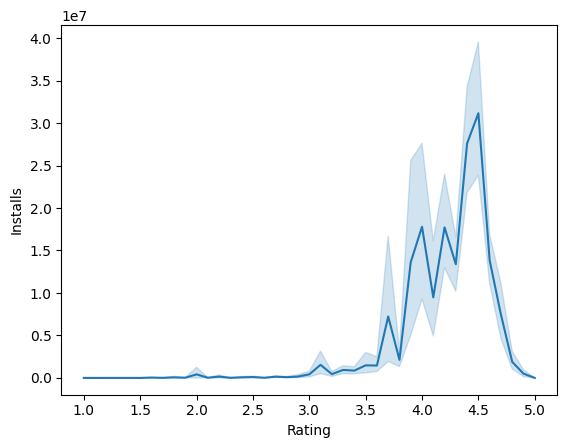

In [110]:
sns.lineplot(x=df['Rating'], y=df['Installs'] ,data=df)

<Axes: xlabel='Rating', ylabel='Price'>

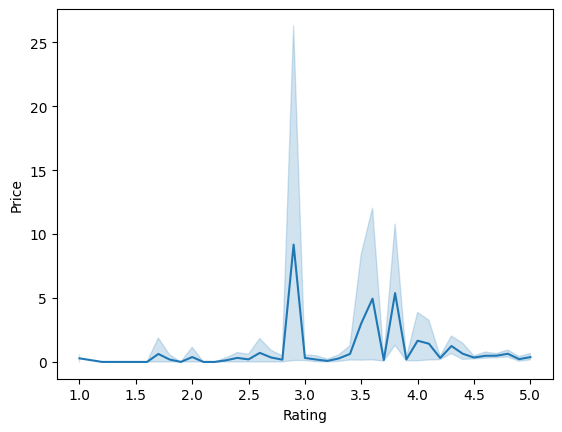

In [111]:
sns.lineplot(x=df['Rating'], y=df['Price'] ,data=df)

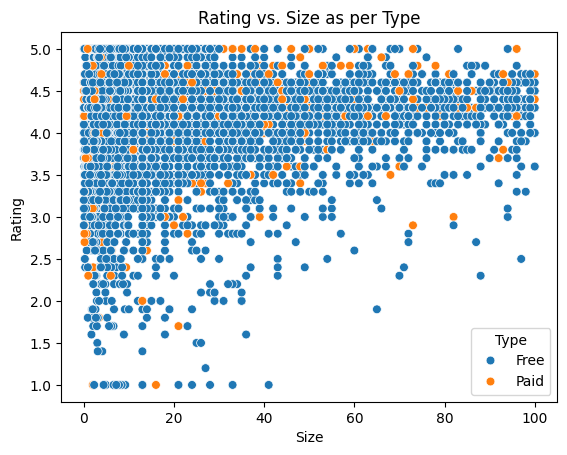

In [112]:
sns.scatterplot(data=df, x='Size', y='Rating', hue='Type', s=40)

plt.title('Rating vs. Size as per Type')
plt.show()

<Axes: xlabel='Type', ylabel='count'>

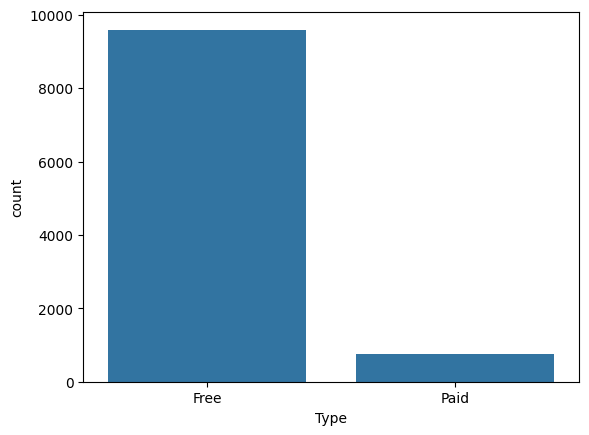

In [113]:
sns.countplot(x=df.Type,data=df)

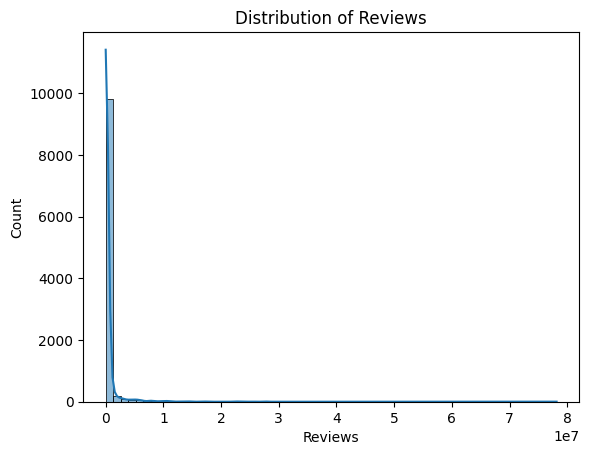

In [114]:
sns.histplot(data=df, x='Reviews', bins=60, kde=True)

plt.title('Distribution of Reviews')
plt.show()

<Axes: xlabel='count', ylabel='Content Rating'>

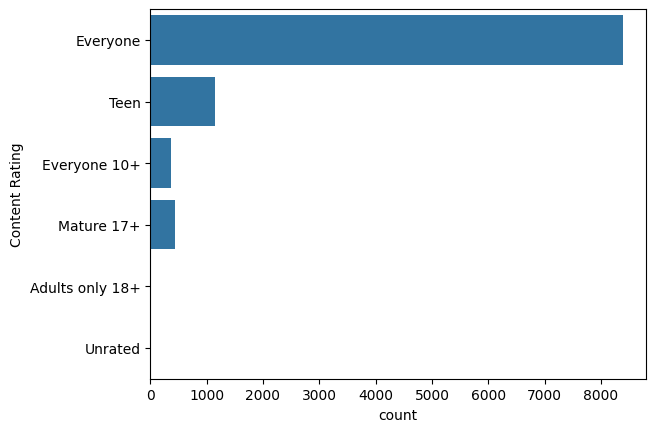

In [115]:
sns.countplot(y=df['Content Rating'],data=df)

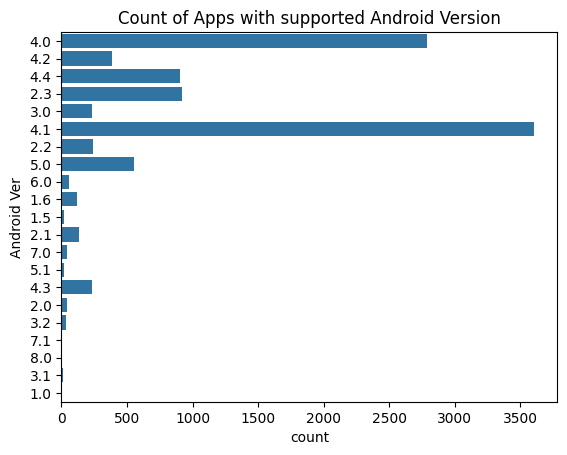

In [116]:
sns.countplot(data=df, y='Android Ver')

plt.title('Count of Apps with supported Android Version')
plt.show()

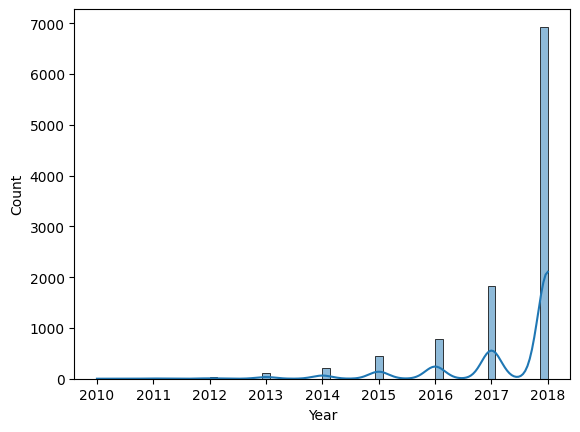

In [117]:
sns.histplot(data=df, x='Year', bins=60, kde=True)
plt.show()

In [118]:
to_be_drop_col = ['App','Genres','Current Ver']

df.drop(to_be_drop_col, axis=1, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10356 non-null  object 
 1   Rating          10356 non-null  float64
 2   Reviews         10356 non-null  int64  
 3   Size            10356 non-null  float64
 4   Installs        10356 non-null  int64  
 5   Type            10356 non-null  object 
 6   Price           10356 non-null  float64
 7   Content Rating  10356 non-null  object 
 8   Android Ver     10356 non-null  object 
 9   Month           10356 non-null  int32  
 10  Year            10356 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(4)
memory usage: 890.0+ KB


In [120]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Month,Year
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0,1,2018
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0,1,2018
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0,8,2018
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2,6,2018
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4,6,2018


In [121]:
categorical_columns=['Category','Type','Content Rating']

In [122]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [123]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Month,Year
0,0,4.1,159,19.0,10000,0,0.0,1,4.0,1,2018
1,0,3.9,967,14.0,500000,0,0.0,1,4.0,1,2018
2,0,4.7,87510,8.7,5000000,0,0.0,1,4.0,8,2018
3,0,4.5,215644,25.0,50000000,0,0.0,4,4.2,6,2018
4,0,4.3,967,2.8,100000,0,0.0,1,4.4,6,2018


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10356 non-null  int64  
 1   Rating          10356 non-null  float64
 2   Reviews         10356 non-null  int64  
 3   Size            10356 non-null  float64
 4   Installs        10356 non-null  int64  
 5   Type            10356 non-null  int64  
 6   Price           10356 non-null  float64
 7   Content Rating  10356 non-null  int64  
 8   Android Ver     10356 non-null  object 
 9   Month           10356 non-null  int32  
 10  Year            10356 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 890.0+ KB


In [125]:
numeric_columns=df.drop(['Category','Type','Content Rating'],axis=1)
numeric_columns.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Ver',
       'Month', 'Year'],
      dtype='object')

In [126]:
scaler = StandardScaler()

df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

In [127]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Month,Year
0,0,-0.213629,-0.150466,-0.050386,-0.176324,0,-0.063328,1,0.147739,-2.070693,0.554599
1,0,-0.625495,-0.150166,-0.288193,-0.170217,0,-0.063328,1,0.147739,-2.070693,0.554599
2,0,1.021970,-0.118075,-0.540269,-0.114135,0,-0.063328,1,0.147739,0.615095,0.554599
3,0,0.610104,-0.070561,0.234983,0.446685,0,-0.063328,4,0.399176,-0.152273,0.554599
4,0,0.198238,-0.150166,-0.820882,-0.175202,0,-0.063328,1,0.650612,-0.152273,0.554599


In [128]:
df.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Month,Year
count,10356.000000,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,10356.000000,1.035600e+04,10356.000000,1.035600e+04,1.035600e+04,1.035600e+04
mean,16.744593,3.073804e-16,-1.646681e-17,-4.253925e-17,-1.097787e-17,0.073870,-3.087526e-18,1.455195,-3.183583e-16,-3.430585e-17,-5.076168e-14
std,8.358433,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.261572,1.000048e+00,1.000638,1.000048e+00,1.000048e+00,1.000048e+00
min,0.000000,-6.597557e+00,-1.505245e-01,-9.535788e-01,-1.764487e-01,0.000000,-6.332845e-02,0.000000,-3.623803e+00,-2.070693e+00,-6.634799e+00
25%,11.000000,-2.136288e-01,-1.505126e-01,-6.829538e-01,-1.764362e-01,0.000000,-6.332845e-02,1.000000,1.477394e-01,-5.359572e-01,-3.440754e-01
50%,14.000000,1.982375e-01,-1.499021e-01,-3.357548e-01,-1.752024e-01,0.000000,-6.332845e-02,1.000000,2.734575e-01,2.314108e-01,5.545993e-01
75%,25.000000,6.101038e-01,-1.333259e-01,2.825448e-01,-1.639860e-01,0.000000,-6.332845e-02,1.000000,2.734575e-01,6.150948e-01,5.545993e-01
max,32.000000,1.639770e+00,2.883160e+01,3.802096e+00,1.228623e+01,1.000000,2.450878e+01,5.000000,5.176462e+00,2.149831e+00,5.545993e-01


In [129]:
x=df.drop(['Rating'],axis=1)
y=df['Rating']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8284, 10)
(2072, 10)
(8284,)
(2072,)


In [132]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

In [133]:
y_pred1

array([ 0.07282825,  0.05057783,  0.07872248, ..., -0.04463511,
       -0.06682739,  0.05607031])

In [134]:
print("MSE : ",mean_squared_error(y_pred1,y_test))
print("MAE : ",mean_absolute_error(y_pred1,y_test))
print("R Score :",r2_score(y_pred1,y_test))

MSE :  0.9900312139340575
MAE :  0.6737786287577536
R Score : -41.34498263293167


In [135]:
svm = SVR(kernel = "linear")
svm.fit(x_train,y_train)
y_pred2 = svm.predict(x_test)

In [ ]:
y_pred2

In [ ]:
print("MSE : ",mean_squared_error(y_pred2,y_test))
print("MAE : ",mean_absolute_error(y_pred2,y_test))
print("R Score :",r2_score(y_pred2,y_test))

In [ ]:
PF = PolynomialFeatures(degree=3)
x_train_poly = pd.DataFrame(PF.fit_transform(x_train))
x_test_poly = pd.DataFrame(PF.fit_transform(x_test))

print(x_train_poly)
print(x_test_poly)

In [ ]:
for i in range(1,4):
  PF = PolynomialFeatures(degree=i)
  x_train_poly = PF.fit_transform(x_train)
  x_test_poly = PF.fit_transform(x_test)

  polynomial_reg = LinearRegression(fit_intercept=False)
  polynomial_reg.fit(x_train_poly, y_train)
  y_pred3 = polynomial_reg.predict(x_test_poly)

  print(f"Degree = {i} , mAE = {mean_absolute_error(y_test, y_pred3)}")

In [ ]:
y_pred3

In [141]:
print("MSE : ",mean_squared_error(y_pred3,y_test))
print("MAE : ",mean_absolute_error(y_pred3,y_test))
print("R Score :",r2_score(y_pred3,y_test))

MSE :  1926.8105666125412
MAE :  1.83170589307035
R Score : -0.0013530365077272233


In [142]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(x_train, y_train)
y_pred4 = decision_tree_reg.predict(x_test)

In [143]:
y_pred4

array([-0.03853171, -0.28783348, -0.28783348, ..., -0.28783348,
       -0.05434075,  0.28324273])

In [144]:
print("MSE : ",mean_squared_error(y_pred4,y_test))
print("MAE : ",mean_absolute_error(y_pred4,y_test))
print("R Score :",r2_score(y_pred4,y_test))

MSE :  0.9140889274763614
MAE :  0.6363051664556999
R Score : -7.0258073299009745


In [145]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(x_train, y_train)
y_pred5 = random_forest_reg.predict(x_test)

In [ ]:
y_pred5

In [147]:
print("MSE : ",mean_squared_error(y_pred5,y_test))
print("MAE : ",mean_absolute_error(y_pred5,y_test))
print("R Score :",r2_score(y_pred5,y_test))

MSE :  0.8958213677451973
MAE :  0.6265775068029302
R Score : -8.949762959927565


In [148]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost = GradientBoostingRegressor()
gradboost.fit(x_train, y_train)

y_pred6 = gradboost.predict(x_test)

In [ ]:
y_pred6

In [150]:
print("MSE : ",mean_squared_error(y_pred6,y_test))
print("MAE : ",mean_absolute_error(y_pred6,y_test))
print("R Score :",r2_score(y_pred6,y_test))

MSE :  0.8579874176533359
MAE :  0.6107009652156429
R Score : -7.169276776293811


In [151]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.001)
lasso.fit(x_train, y_train)

y_pred7 = lasso.predict(x_test)

In [152]:
y_pred7

array([ 0.07179444,  0.05248654,  0.07751281, ..., -0.04186458,
       -0.0816269 ,  0.05494551])

In [153]:
print("MSE : ",mean_squared_error(y_pred7,y_test))
print("MAE : ",mean_absolute_error(y_pred7,y_test))
print("R Score :",r2_score(y_pred7,y_test))

MSE :  0.990619814112768
MAE :  0.6738229982413086
R Score : -43.44497761070198


In [154]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred8 = ridge.predict(x_test)

In [155]:
print("MSE : ",mean_squared_error(y_pred8,y_test))
print("MAE : ",mean_absolute_error(y_pred8,y_test))
print("R Score :",r2_score(y_pred8,y_test))

MSE :  0.9900433951361195
MAE :  0.6737806232884271
R Score : -41.37873729638581
MSE :  0.9900433951361195
MAE :  0.6737806232884271
R Score : -41.37873729638581
